<a href="https://colab.research.google.com/github/kavyatalwar/SuperStore-EDA/blob/main/Superstore_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Sample - Superstore.csv', encoding='ISO-8859-1')

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
# Shape and basic info
print("Shape:", df.shape)
df.info()

# Check for null values
print("Nulls:\n", df.isnull().sum())

# Drop any unnecessary columns if present (e.g., Postal Code)
df.drop(columns=["Postal Code"], inplace=True)

Shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   flo

Text(0, 0.5, 'Amount')

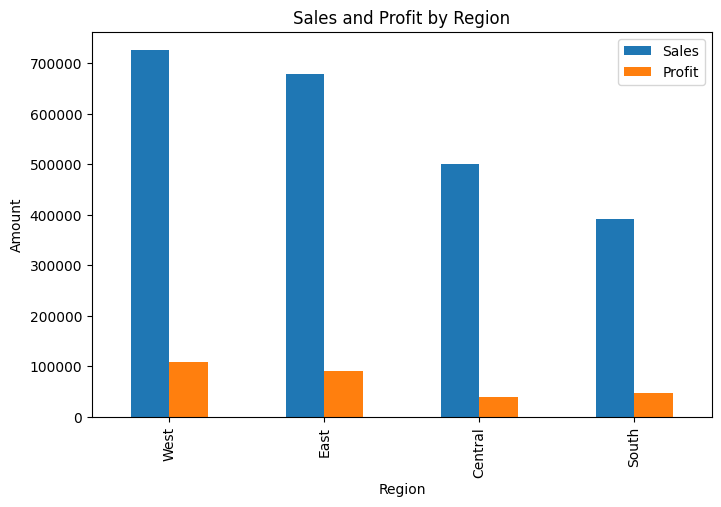

In [13]:
region_perf = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
region_perf.plot(kind='bar', figsize=(8, 5), title='Sales and Profit by Region')
plt.ylabel("Amount")

<Axes: title={'center': 'Profit by Category'}, ylabel='Category'>

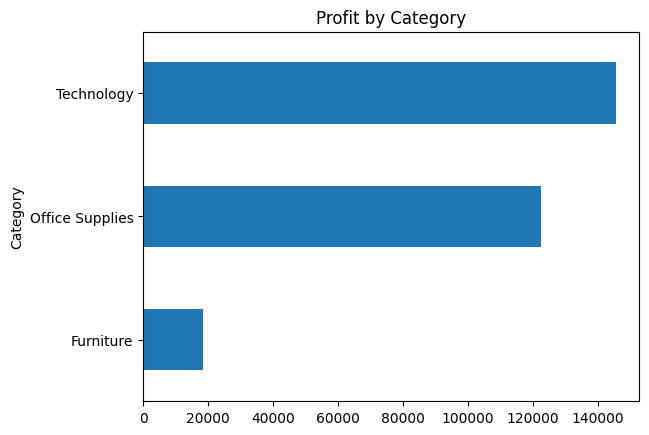

In [14]:
cat_profit = df.groupby("Category")["Profit"].sum().sort_values()
cat_profit.plot(kind='barh', title="Profit by Category")

Text(0.5, 1.0, 'Discount vs Profit')

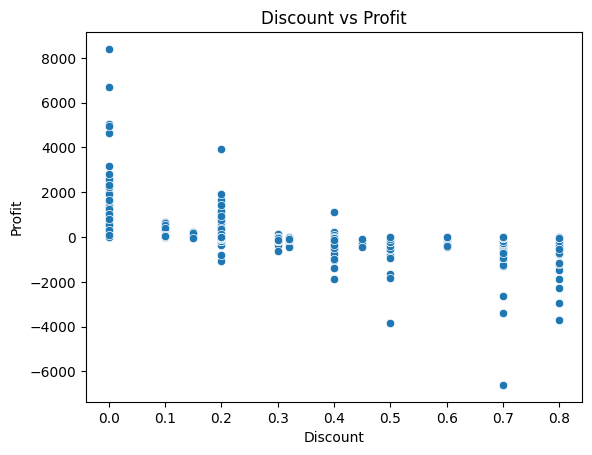

In [15]:
sns.scatterplot(data=df, x="Discount", y="Profit")
plt.title("Discount vs Profit")

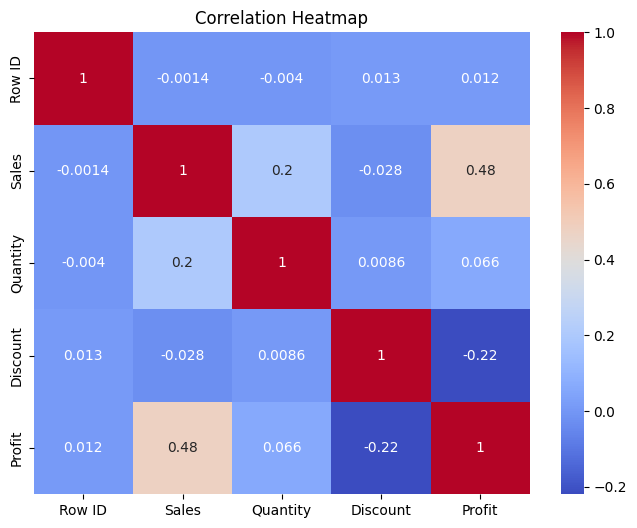

In [17]:
# View only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[["Sales", "Quantity", "Discount"]]
y = df["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Model Score:", lr.score(X_test, y_test))

Model Score: -0.10197257667213155
